In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.exceptions import DataConversionWarning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('Capstone2 Data.csv', dtype={'first_column': 'int', 'second_column': 'int','third_column': 'int', 'fourth_column': 'str', 'fifth_column': 'str', 'sixth_column': 'int', 'seventh_column': 'int', 'eigth_column': 'int', 'ninth_column': 'str' })

C:\Users\codst\AppData\Local\Temp\ipykernel_15460\2295818667.py:1: DtypeWarning: Columns (3,4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Capstone2 Data.csv', dtype={'first_column': 'int', 'second_column': 'int','third_column': 'int', 'fourth_column': 'str', 'fifth_column': 'str', 'sixth_column': 'int', 'seventh_column': 'int', 'eigth_column': 'int', 'ninth_column': 'str' })


In [4]:
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DISTANCE,OP_UNIQUE_CARRIER,NA
0,4,30.0,6.0,CLT,LYH,1430.0,0.0,175.0,MQ,NaN
1,4,9.0,6.0,CLT,LYH,1442.0,0.0,175.0,MQ,NaN
2,4,10.0,4.0,DFW,SHV,2247.0,0.0,190.0,MQ,NaN
3,4,11.0,5.0,DFW,SHV,2230.0,0.0,190.0,MQ,NaN
4,4,12.0,6.0,DFW,SHV,2246.0,0.0,190.0,MQ,NaN


In [5]:
data = data.drop(['NA'], axis=1)

In [6]:
data['DEP_DEL15'].value_counts()

0.0    487135
1.0     82182
Name: DEP_DEL15, dtype: int64

In [7]:
#Positive and Negative
positive_rows = data.DEP_DEL15 == 1.0
data_pos = data.loc[positive_rows]
data_neg = data.loc[~positive_rows]

# Merge the balanced data
data = pd.concat([data_pos, data_neg.sample(n = len(data_pos))], axis = 0)

# Shuffle the order of data
data = data.sample(n = len(data)).reset_index(drop = True)

In [8]:
data.isna().sum()

MONTH                    0
DAY_OF_MONTH         40352
DAY_OF_WEEK          40352
ORIGIN               40352
DEST                 40352
DEP_TIME             40751
DEP_DEL15            40752
DISTANCE             40352
OP_UNIQUE_CARRIER    40352
dtype: int64

In [9]:
data = data.dropna(axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123612 entries, 1 to 164363
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MONTH              123612 non-null  int64  
 1   DAY_OF_MONTH       123612 non-null  float64
 2   DAY_OF_WEEK        123612 non-null  float64
 3   ORIGIN             123612 non-null  object 
 4   DEST               123612 non-null  object 
 5   DEP_TIME           123612 non-null  float64
 6   DEP_DEL15          123612 non-null  float64
 7   DISTANCE           123612 non-null  float64
 8   OP_UNIQUE_CARRIER  123612 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 9.4+ MB


In [10]:
data['DEP_DEL15'] = data['DEP_DEL15'].astype(int)
data.shape

(123612, 9)

In [11]:
data.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,DEP_DEL15,DISTANCE
count,123612.0,123612.000000,123612.000000,123612.000000,123612.000000,123612.000000
mean,4.0,14.613128,4.031259,1454.436535,0.664838,789.190249
std,0.0,8.103083,1.882366,493.855890,0.472049,568.671383
min,4.0,1.000000,1.000000,1.000000,0.000000,31.000000
25%,4.0,7.000000,3.000000,1100.000000,0.000000,370.000000
50%,4.0,14.000000,4.000000,1506.000000,1.000000,645.000000
75%,4.0,21.000000,5.000000,1846.000000,1.000000,1028.000000
max,4.0,30.000000,7.000000,2400.000000,1.000000,5095.000000


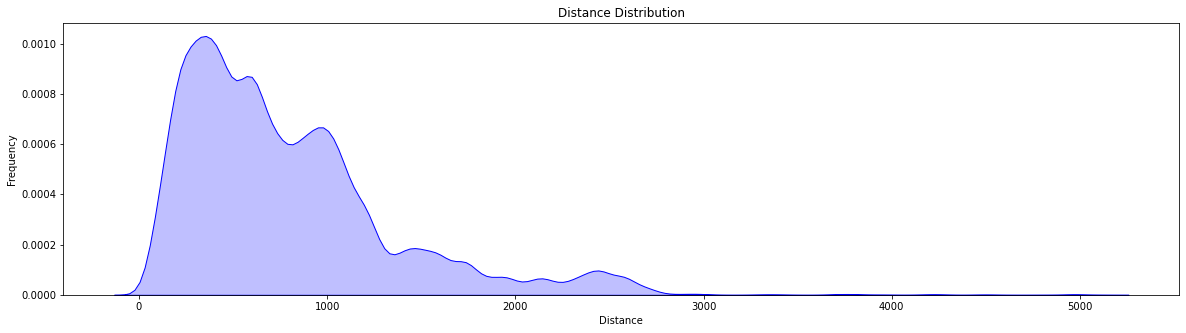

In [12]:
plt.figure(figsize=(20,5))
sns.distplot(data['DISTANCE'], hist=False, color="b", kde_kws={"shade": True})
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.title("Distance Distribution")
plt.show()

In [13]:
print(f"Average distance if there is a delay {data[data['DEP_DEL15'] == 1]['DISTANCE'].values.mean()} miles")
print(f"Average distance if there is no delay {data[data['DEP_DEL15'] == 0]['DISTANCE'].values.mean()} miles")

Average distance if there is a delay 786.1071280815751 miles
Average distance if there is no delay 795.3060342746802 miles


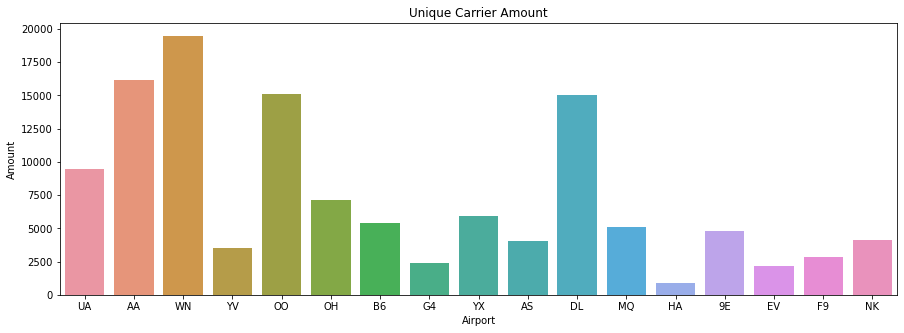

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['OP_UNIQUE_CARRIER'], data=data)
plt.xlabel("Airport")
plt.ylabel("Amount")
plt.title("Unique Carrier Amount")
plt.show()

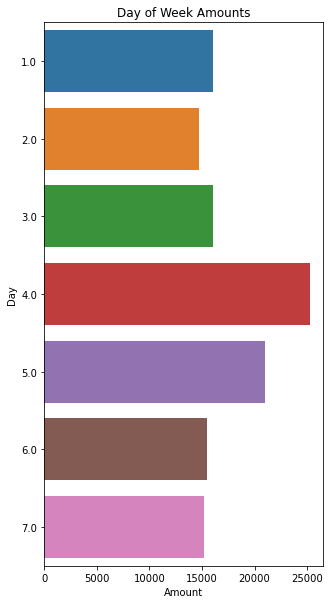

In [16]:
plt.figure(figsize=(5,10))
sns.countplot(y=data['DAY_OF_WEEK'], data=data, orient="h")
plt.xlabel("Amount")
plt.ylabel("Day")
plt.title("Day of Week Amounts")
plt.show()

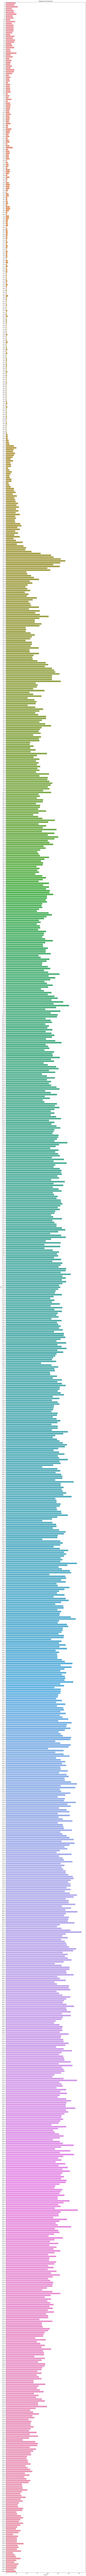

In [19]:
plt.figure(figsize=(15,500))
sns.countplot(y=data['DEP_TIME'], data=data, orient="h")
plt.xlabel("Amount")
plt.ylabel("Time")
plt.title("Departure Time Amount")
plt.show()

In [20]:
data = data.rename(columns={'DEP_DEL15':'TARGET'})

In [21]:
def label_encoding(categories):
    #To perform mapping of categorical features
    categories = list(set(list(categories.values)))
    mapping = {}
    for idx in range(len(categories)):
        mapping[categories[idx]] = idx
    return mapping

In [22]:
data['OP_UNIQUE_CARRIER'] = data['OP_UNIQUE_CARRIER'].map(label_encoding(data['OP_UNIQUE_CARRIER']))
data['DAY_OF_WEEK'] = data['DAY_OF_WEEK'].map(label_encoding(data['DAY_OF_WEEK']))
data['DEP_TIME'] = data['DEP_TIME'].map(label_encoding(data['DEP_TIME']))
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,TARGET,DISTANCE,OP_UNIQUE_CARRIER
1,4,13.0,3,DEN,RNO,832,1,804.0,13
2,4,9.0,6,DFW,BNA,875,1,631.0,12
3,4,13.0,3,CLT,MCO,300,0,468.0,12
5,4,24.0,0,HOU,AUS,839,1,148.0,6
6,4,23.0,6,MDT,IAD,615,1,94.0,4


In [23]:
data['TARGET'].value_counts()

1    82182
0    41430
Name: TARGET, dtype: int64

In [77]:
X = data.drop(['MONTH','TARGET'], axis=1)
y = data[['TARGET']].values

In [79]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=41)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=41)

In [80]:
def get_accuracy(y_true, y_preds):
    # Score of confusion matrix
    true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_true, y_preds).ravel()
    # accuracy
    accuracy = (true_positive + true_negative)/(true_negative + false_positive + false_negative + true_positive)
    return accuracy

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(X_train, y_train)

C:\Users\codst\anaconda3.1\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
#NaiveBayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [34]:
#RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [35]:
#KNN
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [36]:
models = [lr, gnb, rf, knn]
acc = []
for model in models:
    preds_val = model.predict(X_val)
    accuracy = get_accuracy(y_val, preds_val)
    acc.append(accuracy)

In [37]:
model_name = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'KNN']
accuracy = dict(zip(model_name, acc))

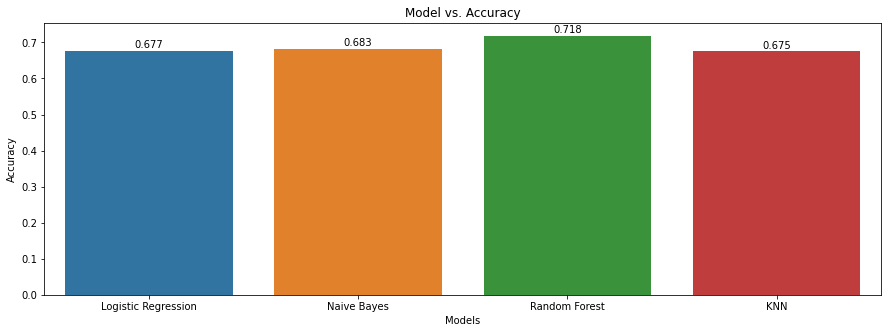

In [38]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x = list(accuracy.keys()), y = list(accuracy.values()))
for p, value in zip(ax.patches, list(accuracy.values())):
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + 0.008
    ax.text(_x, _y, round(value, 3), ha="center") 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model vs. Accuracy")
plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score, accuracy_score, confusion_matrix, f1_score
import sklearn.metrics as metrics

In [40]:
forest = RandomForestClassifier(random_state = 0)

n_estimators = [30, 60, 100, 150, 200]
max_depth = [5, 7, 10, 15, 20]
min_samples_split = [2, 5, 10, 15, 50]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [41]:
print(bestF.best_score_)
print(bestF.best_params_)

0.7182353132465241
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [42]:
def get_measurements(y_test, y_pred, model_name):
    column_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    Auc = auc(fpr,tpr)
    recall = tp / (tp + fn)
    f1 = (2 * precision * recall) / (precision + recall)
    values = np.array([[acc, precision, recall, f1, Auc]])
    summary = pd.DataFrame(values, index=[model_name], columns=column_names)
    return summary

In [43]:
forestOpt = RandomForestClassifier(random_state = 0, max_depth = 20,     
                                   n_estimators = 100, min_samples_split = 2, min_samples_leaf = 1)
                                   
modelOpt = forestOpt.fit(X_train, y_train)
y_pred = modelOpt.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred))

RFT_summary = get_measurements(y_test, y_pred, "Random Forest After Tunning")
RFT_summary

              precision    recall  f1-score   support

           0       0.65      0.36      0.46      8423
           1       0.73      0.90      0.81     16330

    accuracy                           0.72     24753
   macro avg       0.69      0.63      0.63     24753
weighted avg       0.70      0.72      0.69     24753



,Accuracy,Precision,Recall,F1-Score,AUC
Random Forest After Tunning,0.716236,0.731216,0.901102,0.807319,0.629466
